In [44]:
#counts # of comments in a post for a givne ID

import json

def count_comments(file, uid):
    with open(file, 'r') as f:
        data = json.load(f)
        posts = data['posts']
        for post in posts:
            if post['id'] == uid:
                i = 0
                stack = []
                comments = post['comments']

                stack = comments
                while stack != []:  
                    comment = stack.pop()
                    i+=1
                    if len(comment['comments']) > 0:
                        stack = stack + comment['comments']

                return i

count_comments('data/Dogecoin-2022-05-04-01-50-29.json', 'uhdmuq')

33

In [47]:
import os
import pandas as pd
import json

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure




l = []
for file in os.listdir(os.path.join('data')):
    if file.endswith(".json"):

        with open("data/"+file, 'r') as f:
            data = json.load(f)
            posts = data['posts']
            for post in posts:
                    i = 0
                    stack = []
                    comments = post['comments']
                    stack = comments
                    while stack != []:  
                        comment = stack.pop()
                        l.append((comment['id'], comment['author'], comment['score'], comment['created_utc'], comment['depth']))
                        if len(comment['comments']) > 0:
                            stack = stack + comment['comments']

df = pd.DataFrame(columns = ["id", "author", "score", "created_utc", "depth"], data=l)
df = df.astype({'created_utc': 'int64'})
df.sort_values(by=['created_utc'], inplace=True)
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

df['date'] = df['created_utc'].dt.date

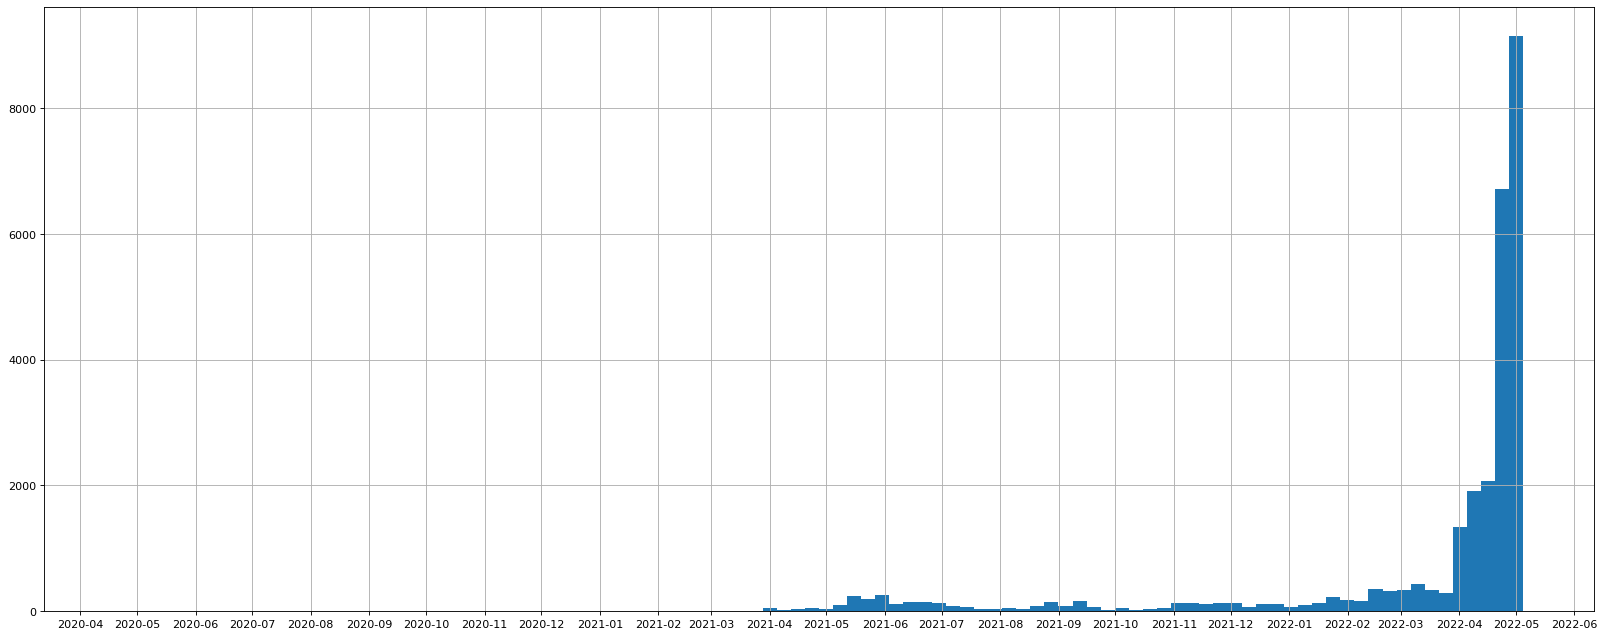

In [48]:
# dates
import matplotlib.dates as mdates
figure(figsize=(25, 10), dpi=80)
ax = df['date'].hist(bins=100)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

In [53]:
ua=len(pd.unique(df['author']))
a=len(df['author'])
print(f"{ua} unique authors in {a} comments, ratio:{ua/a}")

vc = df['author'].value_counts()


print(f'users who posted more than 1 comment: {len(vc[vc>1])}')
print(f'users who posted more than 2 comments: {len(vc[vc>2])}')
print(f'users who posted more than 3 comments: {len(vc[vc>3])}')
print(f'users who posted more than 5 comments: {len(vc[vc>5])}')
print(f'users who posted more than 10 comments: {len(vc[vc>10])}')
print(f'users who posted more than 50 comments: {len(vc[vc>50])}')
print(f'users who posted more than 100 comments: {len(vc[vc>100])}')

13456 unique authors in 29034 comments, ratio:0.4634566370462217
users who posted more than 1 comment: 4301
users who posted more than 2 comments: 2246
users who posted more than 3 comments: 1458
users who posted more than 5 comments: 780
users who posted more than 10 comments: 282
users who posted more than 50 comments: 16
users who posted more than 100 comments: 3


In [50]:
start_date = pd.to_datetime("2022-4-1").date()
after_april_2022 = df[(df['date'] >= start_date)]

print(f'ratio of posts >= 1. april 2022: {len(after_april_2022)/len(df)}')

ratio of posts >= 1. april 2022: 0.7493665387678274
